In [1]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

2023-12-15 12:28:39.281339: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

2023-12-15 12:28:39.828753: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


[]

In [5]:
# § 代碼清單 5-1 實例化一個小型的卷積神經網路
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2023-12-15 12:28:40.655077: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
# § 代碼清單 5-2 在卷積神經網路上添加分類器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
# § 代碼清單 5-3 在MNIST圖像上訓練卷積神經網路
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


2023-12-15 12:28:59.284024: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-15 12:28:59.286573: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1881595000 Hz


Epoch 1/5
938/938 [==============================] - 49s 50ms/step - loss: 0.3794 - accuracy: 0.8812
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0519 - accuracy: 0.9838
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0351 - accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0197 - accuracy: 0.9939


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss= ", test_loss, "acc= ", test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 0.0269 - accuracy: 0.9927
loss=  0.026936428621411324 acc=  0.9926999807357788


In [11]:
# FOR TEST os
#os.path
#print(os.path.isdir(original_dataset_dir))
#print(original_dataset_dir)

fnames = ['{}.jpg'.format(i) for i in range(10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    print(src, dst)
    shutil.copyfile(src, dst)


NameError: name 'original_dataset_dir' is not defined

In [12]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 (要依執行平台修正相對應的路徑)
import os, shutil

#--- FOR Linux Settings ---#
original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'
#--- FOR iMac Settings ---#
#original_dataset_dir = '/Users/earvin/workspaces/datasets/kaggle_original_data'
#base_dir = '/Users/earvin/workspaces/datasets/cats_and_dogs_small'

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
    # 分別對應劃分後的訓練、驗證和測試的目錄
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    # 貓、狗的訓練圖像目錄
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)

    # 貓、狗的驗證圖像目錄
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)

    # 貓、狗的測試圖像目錄
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)


In [13]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 : 複製檔案 (要依執行平台修正相對應的路徑)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [14]:
# check copy status
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [15]:
# § 代碼清單 5-5 將貓狗分類的小型卷積神經網路實例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [17]:
# § 代碼清單 5-6 配置模型用於訓練
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [18]:
# § 代碼清單 5-7 使用ImageDataGenerator從目錄中讀取圖像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
#=== FOR TEST ===#
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
# § 代碼清單 5-8 利用批量生成器儗合模型

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
"""

/home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 83s 791ms/step - loss: 0.6994 - acc: 0.5219 - val_loss: 0.7195 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 77s 766ms/step - loss: 0.6652 - acc: 0.6117 - val_loss: 0.6249 - val_acc: 0.6610
Epoch 3/30
100/100 [==============================] - 76s 756ms/step - loss: 0.6014 - acc: 0.6827 - val_loss: 0.6133 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 78s 785ms/step - loss: 0.5710 - acc: 0.7014 - val_loss: 0.6174 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 76s 761ms/step - loss: 0.5365 - acc: 0.7185 - val_loss: 0.6351 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 75s 749ms/step - loss: 0.5228 - acc: 0.7461 - val_loss: 0.5994 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 77s 770ms/step - loss: 0.4978 - acc: 0.7422 - val_loss: 0.5776 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 7

In [23]:
# § 代碼清單 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')


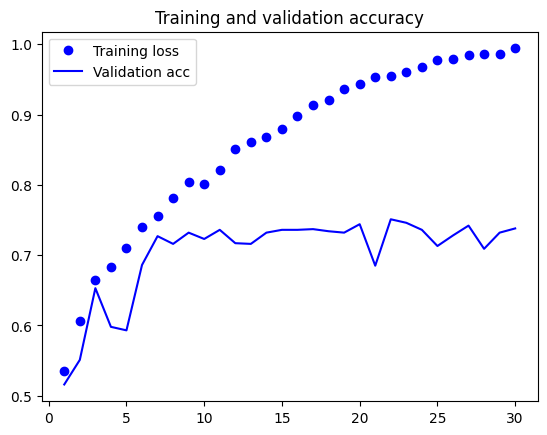

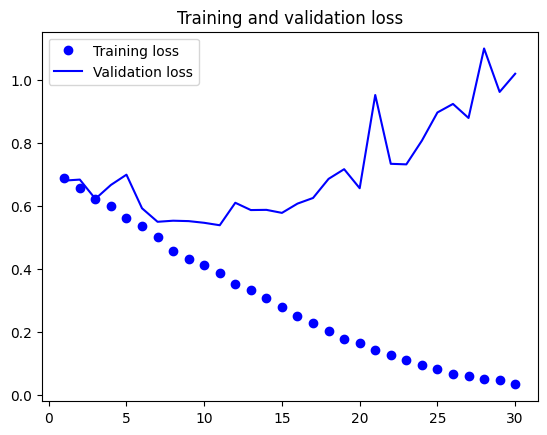

In [24]:
# § 代碼清單 5-10 繪製訓練過程中的損失曲線和精度曲線
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [25]:
#--- TEST h5 document --
import h5py

f = h5py.File('/home/earvin/workspaces/GithubProjects/tensorflow/scripts/cats_and_dogs_small_1.h5','r')
f.keys() #可以查看所有的主键
print([key for key in f.keys()])

['model_weights', 'optimizer_weights']


In [26]:
from keras.models import load_model

# 刪除既有模型變數
#del model 

# 載入模型
model = load_model('cats_and_dogs_small_1.h5')